# Installs + Import

In [1]:
# install packages
%pip install -r requirements.txt

Note: you may need to restart the kernel to use updated packages.


In [2]:
from Classes import *
from Helper import *
global_logger_object.set_save_dir(os.path.join(os.getcwd(), "logs"))

%matplotlib inline
#%matplotlib tk
%autosave 180
%load_ext autoreload
%autoreload 2
%config Completer.use_jedi = False

Autosaving every 180 seconds


# Animal class

## setting

In [3]:
root_dir = r"D:\Experiments\Lorenzo\BMI"
Animal.root_dir = root_dir

## loading

### Load all wanted 

In [4]:
# Select the animals and sessions to load (all means all animals and all sessions in the provided root_dir)
wanted_animal_ids = ["all"] #wanted_animal_ids = ["DON-019385", "DON-019386"]
wanted_session_ids = ["all"] #wanted_session_ids = ["20240215"]
animals = load_all(root_dir, wanted_animal_ids=wanted_animal_ids, wanted_session_ids=wanted_session_ids) # Load all animals

Added animal: DON-019385
Initialized session: DON-019385 20240215


### Load Single Animal

In [5]:
animal_id = 'DON-019385'
animal = load_animal(root_dir, animal_id, wanted_session_ids=["all"])

Added animal: DON-019385
Initialized session: DON-019385 20240215


### Load Single Session from Animal

In [6]:
session_id = "20240215"
session_path = os.path.join(animal.animal_dir, session_id)
session = animal.get_session_data(session_path)

Initialized session: DON-019385 20240215


## get information

### animals

In [7]:
#Load the data from the animals
#and print the attributes in the animal yaml file
animal = animals['DON-019385']
print(animal.animal_dir)
print("session dates:\n\t", list(animal.sessions.keys())) #sessions is a dictionary with the date as the key and the session object as the value
print(animal.animal_id)
print(animal.cohort_year)
print(animal.dob)
print(animal.sex)

D:\Experiments\Lorenzo\BMI\DON-019385
session dates:
	 ['20240215']
DON-019385
2023
20240215
male


### Session

In [8]:
session = animal.sessions["20240215"]
print(session.raw_data_paths)
print(session.mesc_data_paths)
print("--------------------------------------------")
#print attributes for session
to_print_attributes = ["session_type", "daytime", "weight", "notes"]
for attr in to_print_attributes:
    print(session.__dict__[attr])

['D:\\Experiments\\Lorenzo\\BMI\\DON-019385\\20240215\\data\\Image_001_001.raw']
None
--------------------------------------------
habituation
10:00
21.5
Imaging 20 mins, started WD at 5pm


### Load data

In [74]:
# for loading data binarization need to be run first
# load fluorescence data
f = session.load_fluoresence_from_cabincorr(fluorescence_type="F_detrended")

# load binarized fluorescence
f_up = session.load_fluoresence_from_cabincorr(fluorescence_type="F_upphase")

# load correlation, pvalues and z-score matrices
corr_matrix, pval_matrix, z_score_matrix = session.load_corr_matrix(generate=False, remove_geldrying=False)

Loading D:\Experiments\Lorenzo\BMI\DON-019385\20240215\data\tif\suite2p\plane0\allcell_corr_pval_zscore.npy


### Unit (fluoresence, contours)

In [47]:
# units = session.get_units(unit_type="all")
# units = session.get_units(unit_type="single")
units = session.get_units(unit_type="summary")
unit = units[""]    # get all units concatenated

No binary path to ['data.bin', 'Image_001_001.raw'] found in ['D:\\Experiments\\Lorenzo\\BMI\\DON-019385\\20240215\\data\\tif\\suite2p\\plane0', 'D:\\Experiments\\Lorenzo\\BMI\\DON-019385\\20240215\\data\\tif\\suite2p\\plane0\\data']
Loading Unit DON-019385 20240215 
ERROR: yaml file not found:  F:Steffen_Experiments\DON-019385\DON-019385.yaml
   please make yaml file to start
   see the local file DON-014451.yaml for an example
   (you only need to insert session_names for now)
Suite2p: Cells: 269  Good: 187.0  Bad: 82.0


In [71]:
# metadata
print(unit.unit_id) # empty if standard unit else "S1" or "merged"
print(unit.unit_type)
print(unit.session_part)

# imaging metadata
print(unit.yx_shift)                    # for longtiudinal alignment, must be manually set in yaml file
print(unit.rot_center_yx)               # for longtiudinal alignment, must be manually set in yaml file

# cell data
print(unit.fluorescence.shape)          # list of fluorescence traces
print(np.array(unit.contours).shape)    # list of contours
print(unit.footprints.shape)            # list of footprints
print(unit.c)                           # Calcium class from catalin

## movement (only for femtonics should be saved in TRD-2P)
#unit.load_movement()
#print(unit.velocity)


summary
['001']
[0, 0]
[0, 0]
(187, 90000)
(187,)
(187, 512, 512)


C:\Users\mauls\AppData\Local\Temp\ipykernel_2124\3831365887.py:12: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  print(np.array(unit.contours).shape)    # list of contours


In [73]:
unit.c.F_detrended # show calcium attribute F_detrended (fluoresence )

array([[-0.06848925, -0.06123989, -0.0554009 , ..., -0.01033268,
        -0.01035414, -0.01045261],
       [ 0.12977605,  0.11875126,  0.1080116 , ...,  0.5463748 ,
         0.5614706 ,  0.5778961 ],
       [-0.03144894, -0.02685484, -0.02233111, ...,  0.00409808,
         0.01231041,  0.02153934],
       ...,
       [ 1.7460409 ,  1.7228112 ,  1.7020006 , ..., -0.05421697,
        -0.0543041 , -0.05478953],
       [-0.21305096, -0.18515553, -0.1585934 , ..., -0.10388631,
        -0.1020644 , -0.10074819],
       [-0.01059687, -0.00622821, -0.00244318, ..., -0.04758431,
        -0.05324975, -0.05932114]], dtype=float32)

## Plotting

In [13]:
# create a Vizualizer object
viz = Vizualizer(animals, save_dir=root_dir)

### Fluoresence

#### Raster (Show Binarized data)

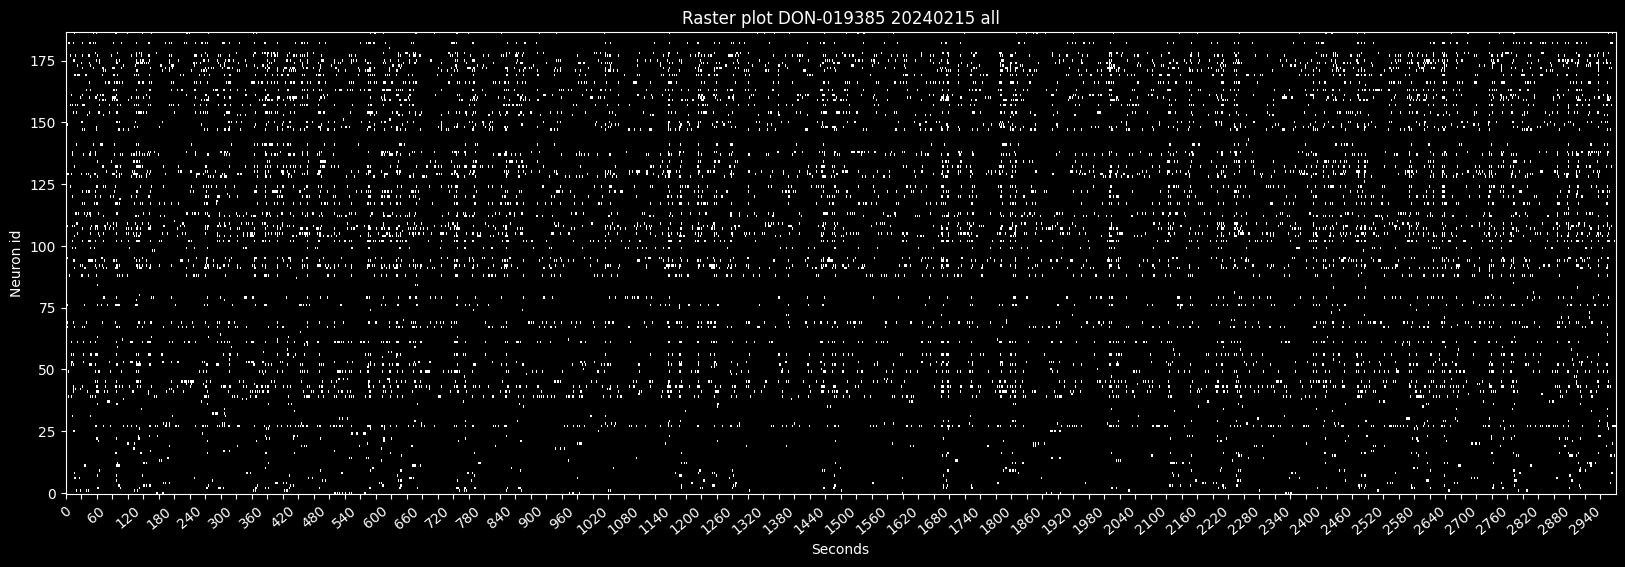

In [81]:
f_upphase = session.load_fluoresence_from_cabincorr(fluorescence_type="F_upphase")
viz.save_rasters_fig(f_upphase, animal_id=animal_id, session_id=session_id)

#### Traces

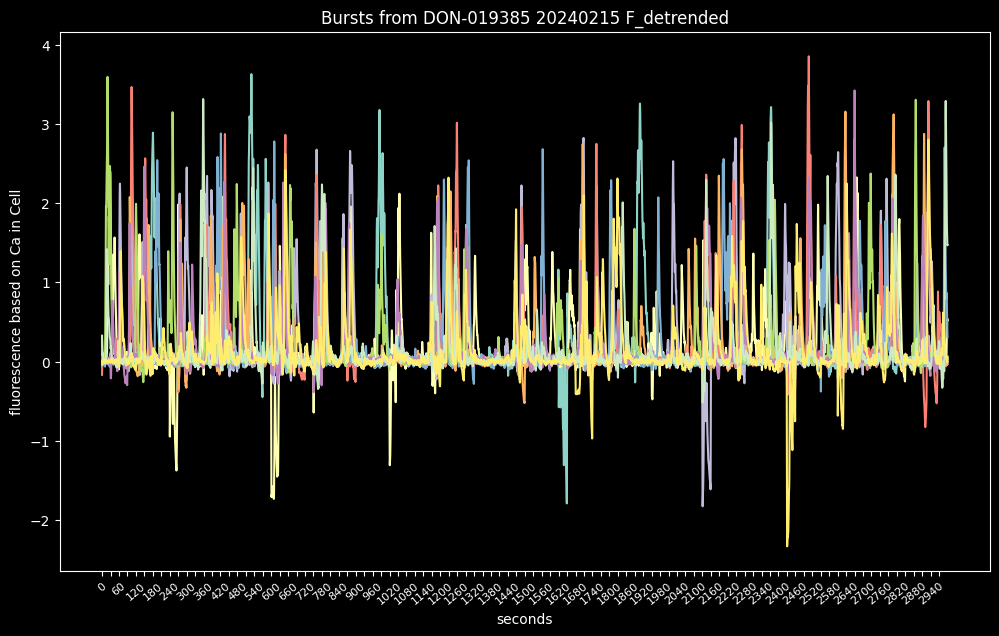

(187, 90000)

In [76]:
# Fluorescence
fluoresence = viz.bursts(animal_id="DON-019385", session_id="20240215", num_cells=10, fluorescence_type="F_detrended")
fluoresence.shape

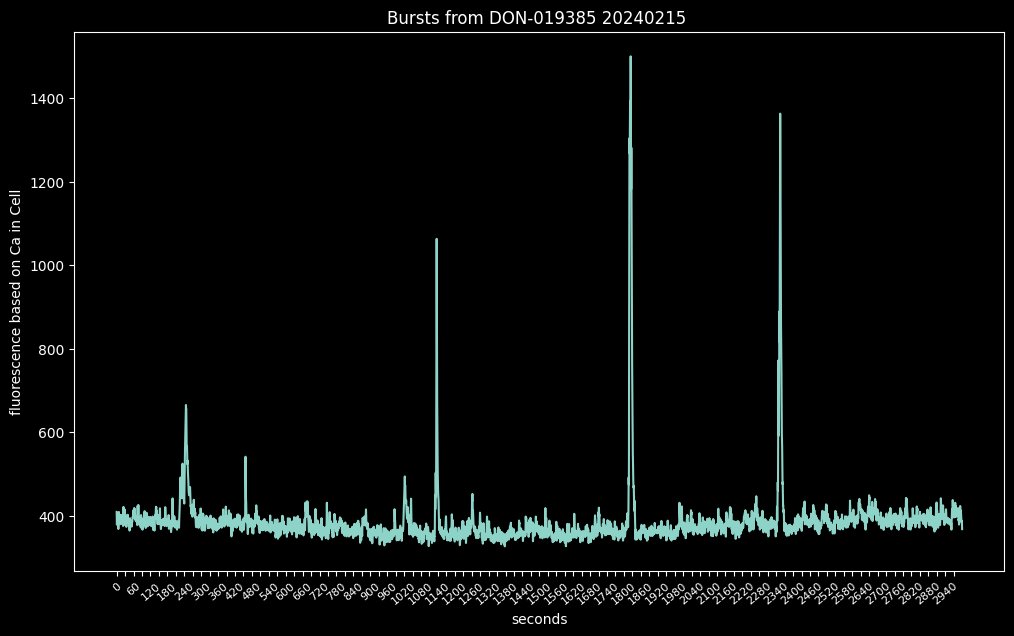

In [21]:
viz.traces(fluoresence[45], session_id="20240215", animal_id="DON-019385")

#### Pearson Correlations and Histogram

Loading D:\Experiments\Lorenzo\BMI\DON-019385\20240215\data\tif\suite2p\plane0\allcell_corr_pval_zscore.npy


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


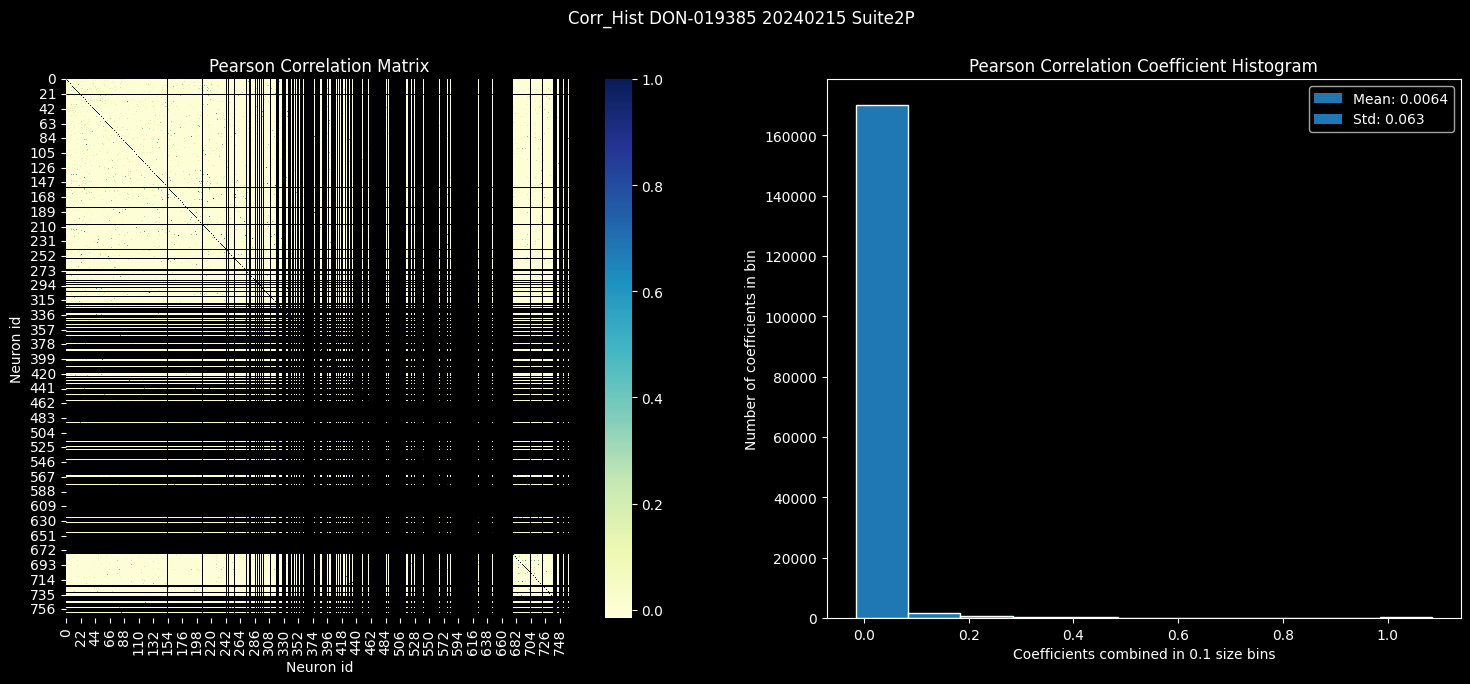

In [32]:
session_id = "20240215"
# Therefore pairwise correlation needs to be run 
# session.generate_cabincorr(generate=True, compute_corrs=True, parallel=True)
corr_matrix, pval_matrix = viz.pearson_hist(animal_id, session_id, remove_geldrying=False)

#### Kernel Density Estimation

DON-019385 20240215
Loading D:\Experiments\Lorenzo\BMI\DON-019385\20240215\data\tif\suite2p\plane0\allcell_corr_pval_zscore.npy


<Figure size 640x480 with 0 Axes>

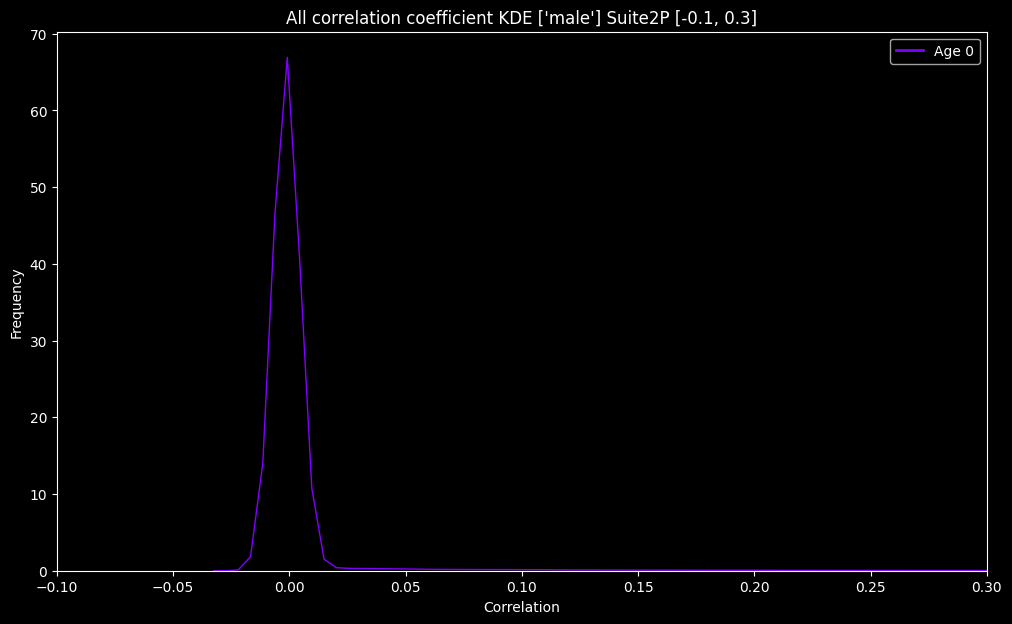

In [40]:
#Plotting KDE for every mouse(Kernel Density Estimation)
filter =  "male"        #sex
#filter =  "DON-019385"  #list(animals.keys())
#filter =  "2023"        #cohor year
#filer = []              #all animals
x_axes_range = [-0.1, 0.3]
viz.pearson_kde(filters=filter, x_axes_range=x_axes_range, average_by_pday=False, remove_geldrying=False)

### Unit Cells

In [ ]:
units = session.get_units(unit_type="summary")
unit = units[""]

#### Contours + Footprints

In [56]:
units = session.get_units(unit_type="single")

2024-03-18 14:56:50,518 - GlobalLogger - ERROR - No s2p folder found for D:\Experiments\Lorenzo\BMI\DON-019385\20240215\data\Image_001_001_MUnit_0: D:\Experiments\Lorenzo\BMI\DON-019385\20240215\data\tif\suite2p_D:\Experiments\Lorenzo\BMI\DON-019385\20240215\data\Image_001_001_MUnit_0.
2024-03-18 14:56:50,518 - GlobalLogger - ERROR - No s2p folder found for D:\Experiments\Lorenzo\BMI\DON-019385\20240215\data\Image_001_001_MUnit_0: D:\Experiments\Lorenzo\BMI\DON-019385\20240215\data\tif\suite2p_D:\Experiments\Lorenzo\BMI\DON-019385\20240215\data\Image_001_001_MUnit_0.
2024-03-18 14:56:50,518 - GlobalLogger - ERROR - No s2p folder found for D:\Experiments\Lorenzo\BMI\DON-019385\20240215\data\Image_001_001_MUnit_0: D:\Experiments\Lorenzo\BMI\DON-019385\20240215\data\tif\suite2p_D:\Experiments\Lorenzo\BMI\DON-019385\20240215\data\Image_001_001_MUnit_0.
2024-03-18 14:56:50,518 - GlobalLogger - ERROR - No s2p folder found for D:\Experiments\Lorenzo\BMI\DON-019385\20240215\data\Image_001_001_

Data path does not exist. Skipping Backup
Data path does not exist. Skipping Backup
No binary path to ['data.bin', 'Image_001_001.raw'] found in ['D:\\Experiments\\Lorenzo\\BMI\\DON-019385\\20240215\\data\\tif\\suite2p_D:\\Experiments\\Lorenzo\\BMI\\DON-019385\\20240215\\data\\Image_001_001_MUnit_0\\plane0', 'D:\\Experiments\\Lorenzo\\BMI\\DON-019385\\20240215\\data\\tif\\suite2p_D:\\Experiments\\Lorenzo\\BMI\\DON-019385\\20240215\\data\\Image_001_001_MUnit_0\\plane0\\data']
Loading Unit DON-019385 20240215 D:\Experiments\Lorenzo\BMI\DON-019385\20240215\data\Image_001_001_MUnit_0


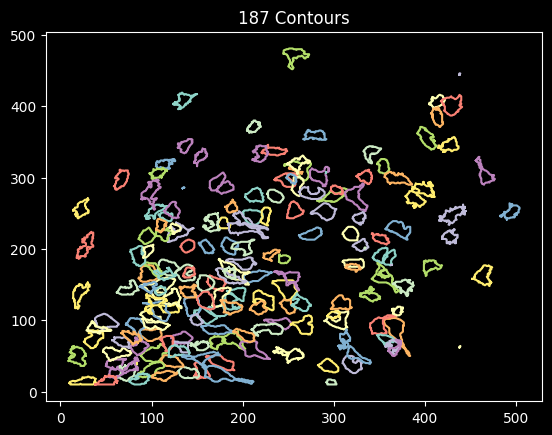

In [54]:
viz = Vizualizer(animals, save_dir=root_dir)
viz.contours(unit.contours)

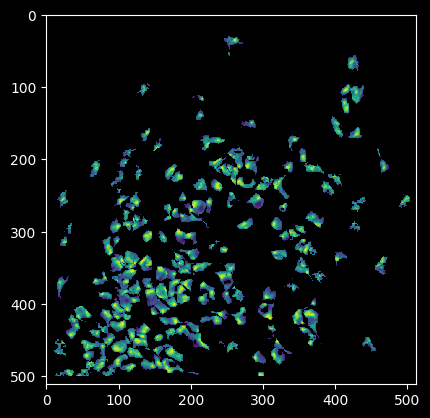

In [55]:
viz.footprints(unit.footprints)

## Run Data Pre-Processing (better on Scicore, look into ```run_scicore_helper.ipynb```)

### Mesc/Raw --> Tiff

In [9]:
session.generate_tiff(generate=True)

.mesc -> .tiff file already done
D:\Experiments\Lorenzo\BMI\DON-019385\20240215\data\Image_001_001_MUnit_0.tiff
... skipping conversion...


['D:\\Experiments\\Lorenzo\\BMI\\DON-019385\\20240215\\data\\Image_001_001_MUnit_0.tiff']

### Tiff --> Suite2p

In [10]:
session.generate_suite2p(generate=True, delete=False)

.tiff -> suite2p folder already done
D:\Experiments\Lorenzo\BMI\DON-019385\20240215\data\tif\suite2p
... skipping conversion...


['D:\\Experiments\\Lorenzo\\BMI\\DON-019385\\20240215\\data\\tif\\suite2p']

### Suite2p --> Binarization

In [11]:
session.generate_cabincorr(generate=True)

ERROR: yaml file not found:  F:Steffen_Experiments\DON-019385\DON-019385.yaml
   please make yaml file to start
   see the local file DON-014451.yaml for an example
   (you only need to insert session_names for now)


['D:\\Experiments\\Lorenzo\\BMI\\DON-019385\\20240215\\data\\tif\\suite2p\\plane0\\binarized_traces.npz']

### Suite2p --> Binarization --> Pairwise Correlation

In [ ]:
session.generate_cabincorr(generate=True, compute_corrs=True, parallel=True)